## Recall@K graphs for predictors

In [1]:
# all aux imports
import pandas as pd
import numpy as np
import pickle
import random
import glob
from pathlib import Path
import csv
from collections import namedtuple, defaultdict
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style(style='whitegrid')

%matplotlib inline

In [2]:
XP_NAME = 'baselines'
XP_PATH = './xps/%s/' % XP_NAME

In [3]:
XP_PATH

'./xps/baselines/'

In [4]:
## load categories of amazon DS

parent_path = r'D:\Datasets\amazon_reviews\gzips'
files = [Path(f) for f in glob.glob(parent_path  + r"\*.gz", recursive=False)]
categories = [' '.join(file.stem.split('_')[1:-1]) for file in files]

In [5]:
categories

['Books',
 'CDs and Vinyl',
 'Cell Phones and Accessories',
 'Clothing Shoes and Jewelry',
 'Electronics',
 'Health and Personal Care',
 'Home and Kitchen',
 'Kindle Store',
 'Movies and TV',
 'Sports and Outdoors',
 'Toys and Games',
 'Video Games']

In [6]:
predictors = ['Normal Predictor']

In [7]:
## Load DataFrames
df_per_cat = {}
for cat in categories:
    dfs = []
    for p in predictors:
        file_name = 'kpr_%s_%s.csv' % (p, cat)
        
        df  = pd.read_csv(XP_PATH + file_name)
        dfs.append(df)
    
    #complete_df = pd.merge(*dfs, on ='k')
    df_per_cat[cat] = dfs

In [8]:
df_per_cat.keys()

dict_keys(['Movies and TV', 'Toys and Games', 'CDs and Vinyl', 'Health and Personal Care', 'Clothing Shoes and Jewelry', 'Sports and Outdoors', 'Kindle Store', 'Home and Kitchen', 'Electronics', 'Cell Phones and Accessories', 'Video Games', 'Books'])

## Visualize categories

In [9]:
def viz_cat(cat):
    f, ax = plt.subplots()#figsize=(8, 5))
    ax.set(xlim=(0, 200), ylim = (0, 1))

    labels = []
    for df in df_per_cat[cat]: 
        sns.lineplot(y='recall', x = 'k', palette='deep', data=df.sort_values(by='k'), ax = ax)
        labels.append(df.iloc[0].predictor)

    plt.legend(labels, loc='lower right')
    ax.set(xlabel='M', ylabel='Recall')
    plt.tight_layout()


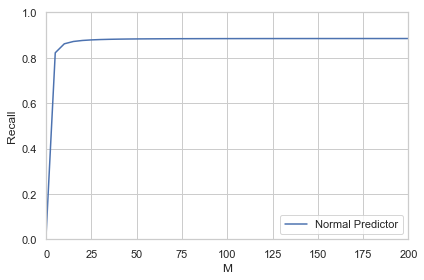

In [10]:
viz_cat('Books')

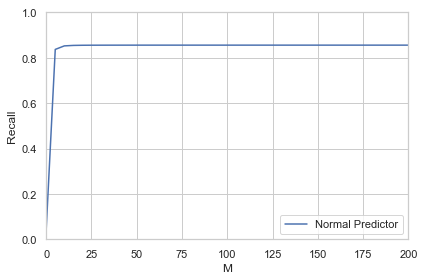

In [11]:
viz_cat('Electronics')